<a href="https://colab.research.google.com/github/Subhodeep13/Visualization-/blob/main/Diffential_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a exploratory data analysis using seaborn and diffrentioanl statistics in order to explore the type of used cars people like to go for , the data set used here is a used car dataset which we took from kaggle .**


. The information which the dataset contatins are :
1. 	manufacturer_name 
2. Model name
3. transmission type 
4. color
5. odometer value 
6.year produced 
7. engine fuel 
8. engine has gas 
9.engine type 
10. engine capacity 
11. body type 
12. has warranty 
13. state 
14. drivetrain
15. price usd
16. is exchangeable 
17. location region
15. number of photos 
16. up counter 



In [ ]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
from google.colab import files
uploaded = files.upload()


Saving cars.csv to cars.csv


In [ ]:
df = pd.read_csv("cars.csv" )
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


In [ ]:
df.sample(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
33146,Chery,Fora,mechanical,other,193500,2008,gasoline,False,gasoline,1.6,sedan,False,owned,front,1612.44,False,Витебская обл.,6,12,False,False,False,True,False,False,False,False,False,True,29
12186,Renault,Laguna,mechanical,silver,227000,2002,gasoline,False,gasoline,2.0,universal,False,owned,front,2999.00,True,Могилевская обл.,11,9,False,True,True,True,True,True,False,True,True,False,18
23761,Volvo,XC90,automatic,silver,321404,2003,diesel,False,diesel,2.4,suv,False,owned,all,9200.00,False,Брестская обл.,14,1,False,False,True,True,True,False,True,False,True,True,6
24323,Chevrolet,Malibu,automatic,white,65000,2016,gasoline,False,gasoline,1.5,sedan,False,owned,front,13300.00,False,Минская обл.,17,24,False,True,True,True,False,False,True,True,True,True,65
4751,Acura,ZDX,automatic,other,162383,2010,gasoline,False,gasoline,3.7,suv,False,owned,all,15000.00,False,Минская обл.,4,31,False,True,True,False,True,True,False,True,True,True,153


In [ ]:
#type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [ ]:
#the distribution is not normal as mean and median seems to differ
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb7d124390>,
      dtype=object)

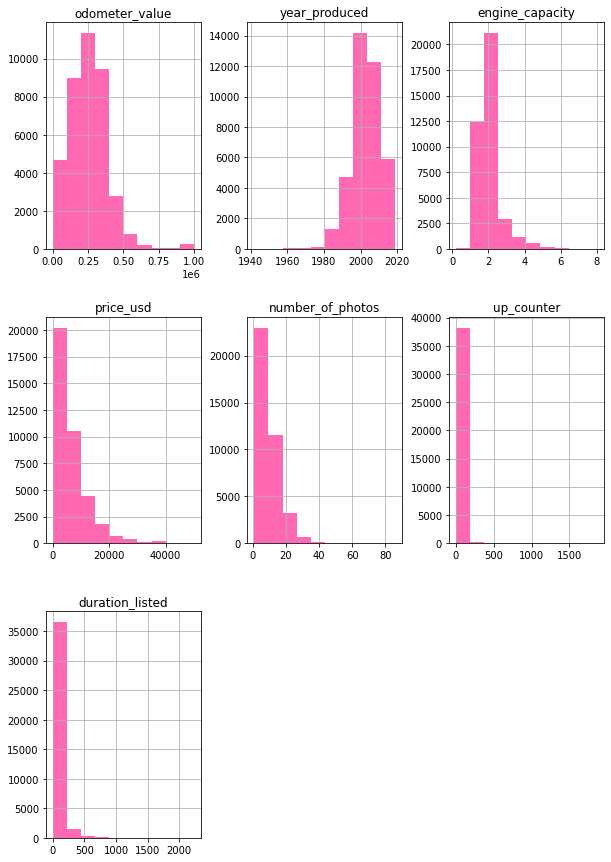

In [ ]:
df.hist(figsize=(10,15), color= "hotpink")

The graphs give us the following ideas :

1. The cars produced after year 2000 is in higher demand 
2. The cars with engine capacity around 2 are prefered more .

In [ ]:
pd.crosstab(df['engine_type'],df['body_type'])

body_type,cabriolet,coupe,hatchback,liftback,limousine,minibus,minivan,pickup,sedan,suv,universal,van
engine_type,,,,,,,,,,,,
diesel,4,31,1571,96,0,1261,1956,74,2554,1679,2937,711
electric,0,0,8,2,0,0,0,0,0,0,0,0
gasoline,71,621,6065,454,12,108,1652,55,10457,3485,2570,97


gasoline cars are prefered over diesel and electric cars .

sedan are mostly the choice over other segments 

In [ ]:
pd.pivot_table(df,["price_usd"], index=['transmission' , 'engine_fuel'],columns=['body_type'],aggfunc=len)

price_usd                   ...                         
body_type                  cabriolet  coupe hatchback  ...     suv universal    van
transmission engine_fuel                               ...                         
automatic    diesel              1.0   13.0     132.0  ...  1130.0     536.0   10.0
             electric            NaN    NaN       8.0  ...     NaN       NaN    NaN
             gas                 NaN    5.0      11.0  ...   164.0      51.0    NaN
             gasoline           39.0  289.0    1140.0  ...  2484.0     492.0    2.0
             hybrid-diesel       NaN    1.0       NaN  ...     NaN       NaN    NaN
             hybrid-petrol       NaN    5.0      63.0  ...    24.0      10.0    NaN
mechanical   diesel              3.0   17.0    1439.0  ...   549.0    2401.0  701.0
             gas                 NaN    4.0     114.0  ...    51.0     153.0   13.0
             gasoline           32.0  316.0    4732.0  ...   762.0    1861.0   82.0
             hybrid-diesel       NaN    NaN       NaN  ...     NaN       NaN    NaN
             hybrid-petrol       NaN    2.0       5.0  ...     NaN       3.0    NaN

[11 rows x 12 columns]

Mostly people tend to buy gasoline fueled cars with any transmisson , the transmisson seems to mechanical which is favoured in both cases 

In [ ]:
pd.pivot_table(df,["odometer_value"], index=['transmission' , 'engine_fuel'],columns=['body_type'],aggfunc=len)

odometer_value         ...                 
body_type                       cabriolet  coupe  ... universal    van
transmission engine_fuel                          ...                 
automatic    diesel                   1.0   13.0  ...     536.0   10.0
             electric                 NaN    NaN  ...       NaN    NaN
             gas                      NaN    5.0  ...      51.0    NaN
             gasoline                39.0  289.0  ...     492.0    2.0
             hybrid-diesel            NaN    1.0  ...       NaN    NaN
             hybrid-petrol            NaN    5.0  ...      10.0    NaN
mechanical   diesel                   3.0   17.0  ...    2401.0  701.0
             gas                      NaN    4.0  ...     153.0   13.0
             gasoline                32.0  316.0  ...    1861.0   82.0
             hybrid-diesel            NaN    NaN  ...       NaN    NaN
             hybrid-petrol            NaN    2.0  ...       3.0    NaN

[11 rows x 12 columns]

In [ ]:
corr= df.corr()

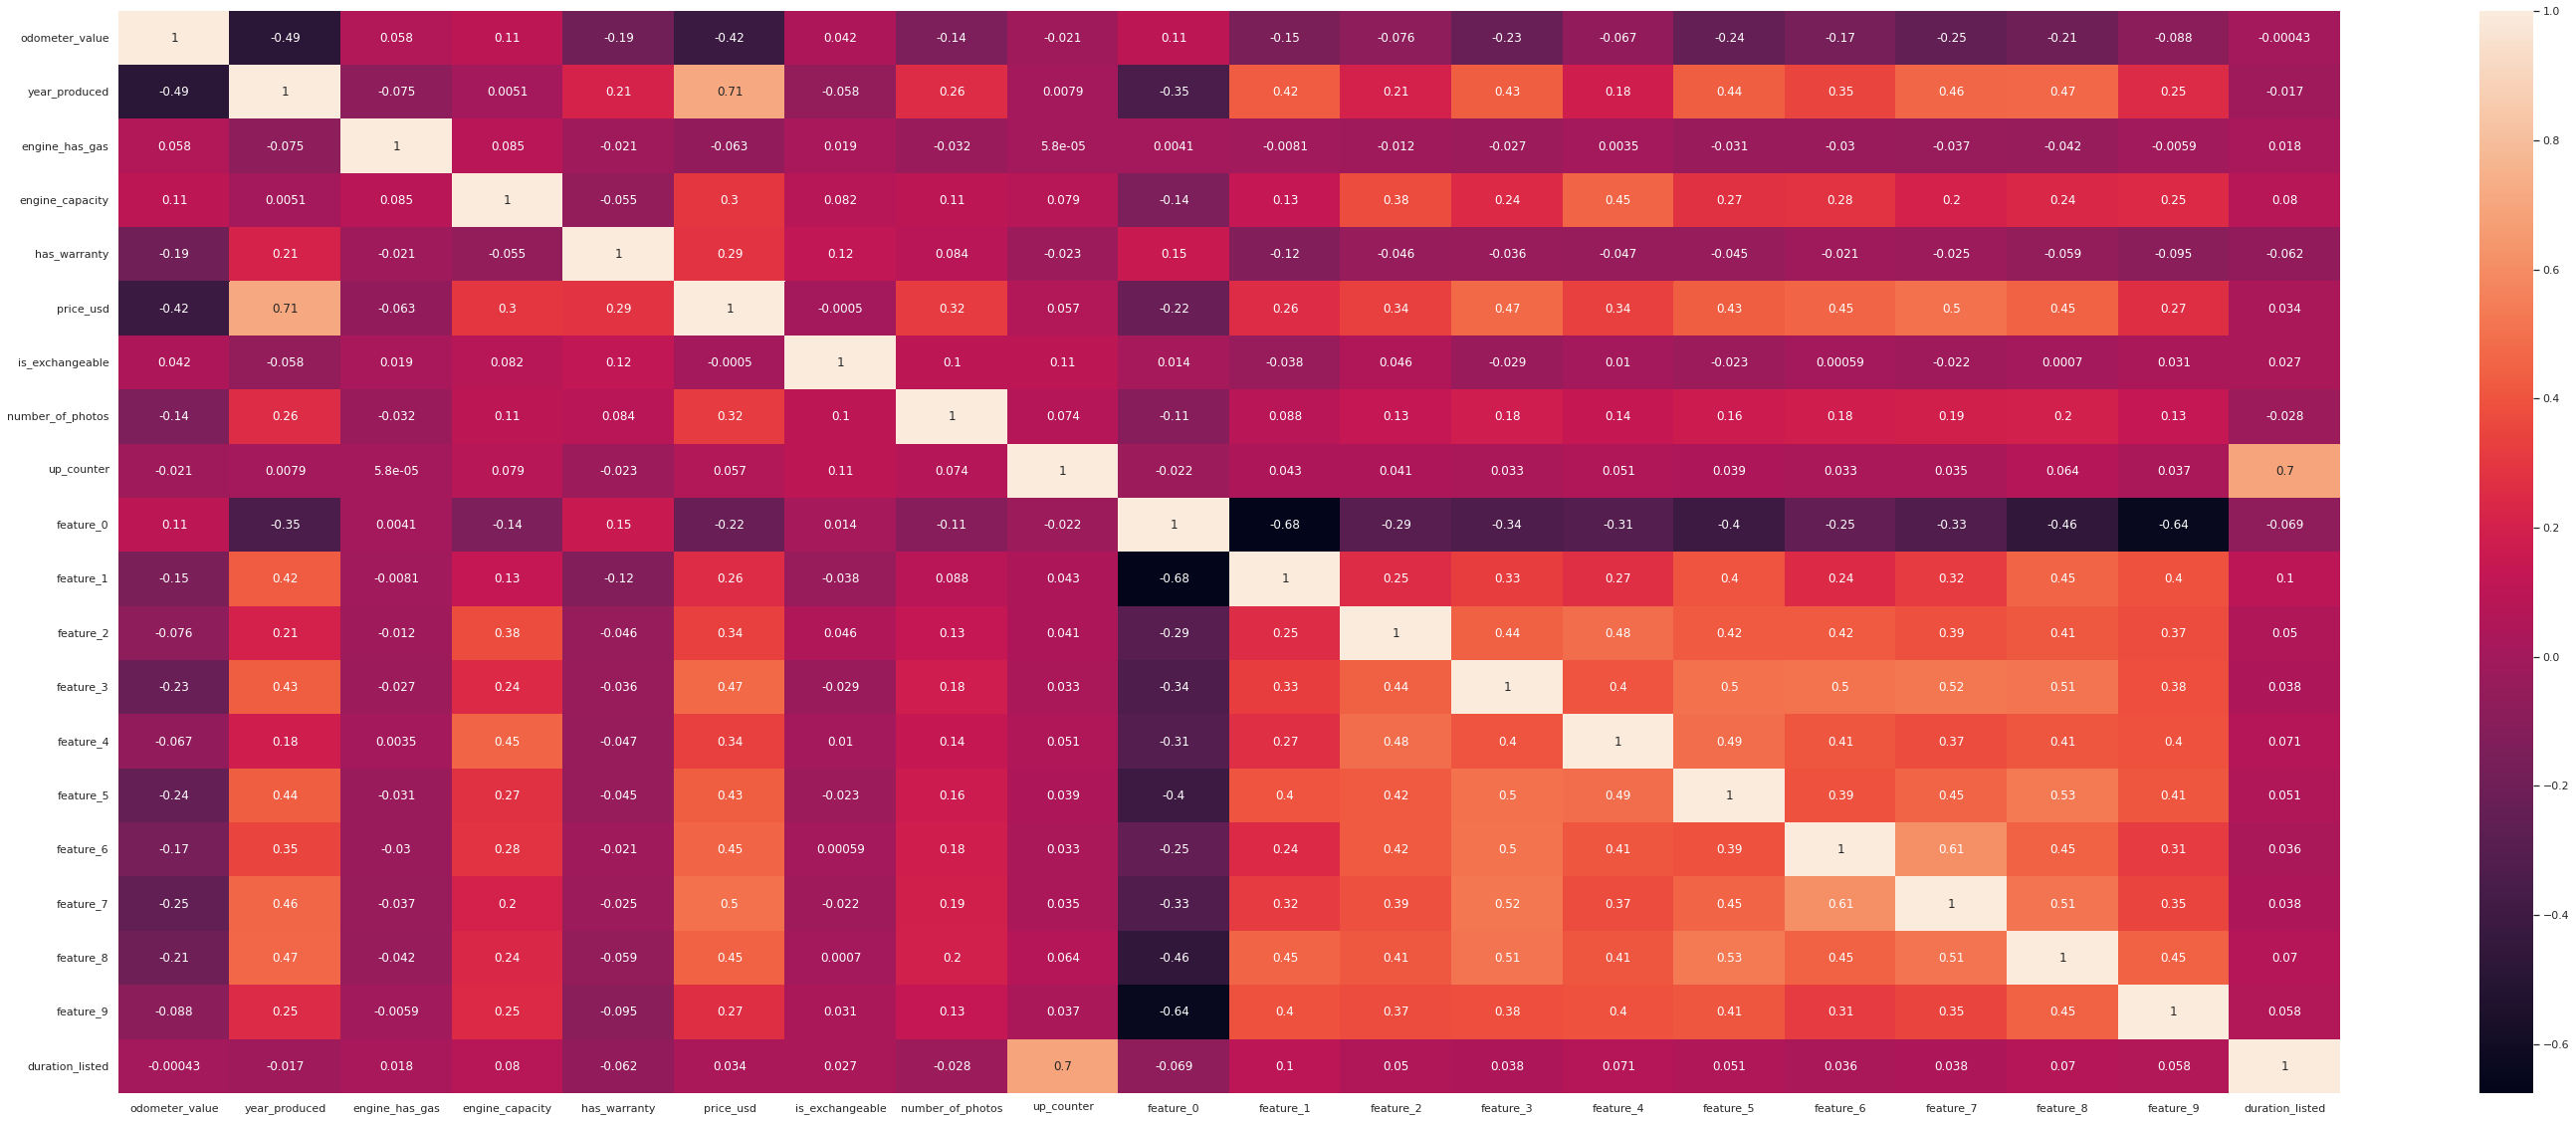

In [ ]:
sns.set(rc = {'figure.figsize':(50,20)})
sns.heatmap(corr , annot =True )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb5f377c10>,
      dtype=object)

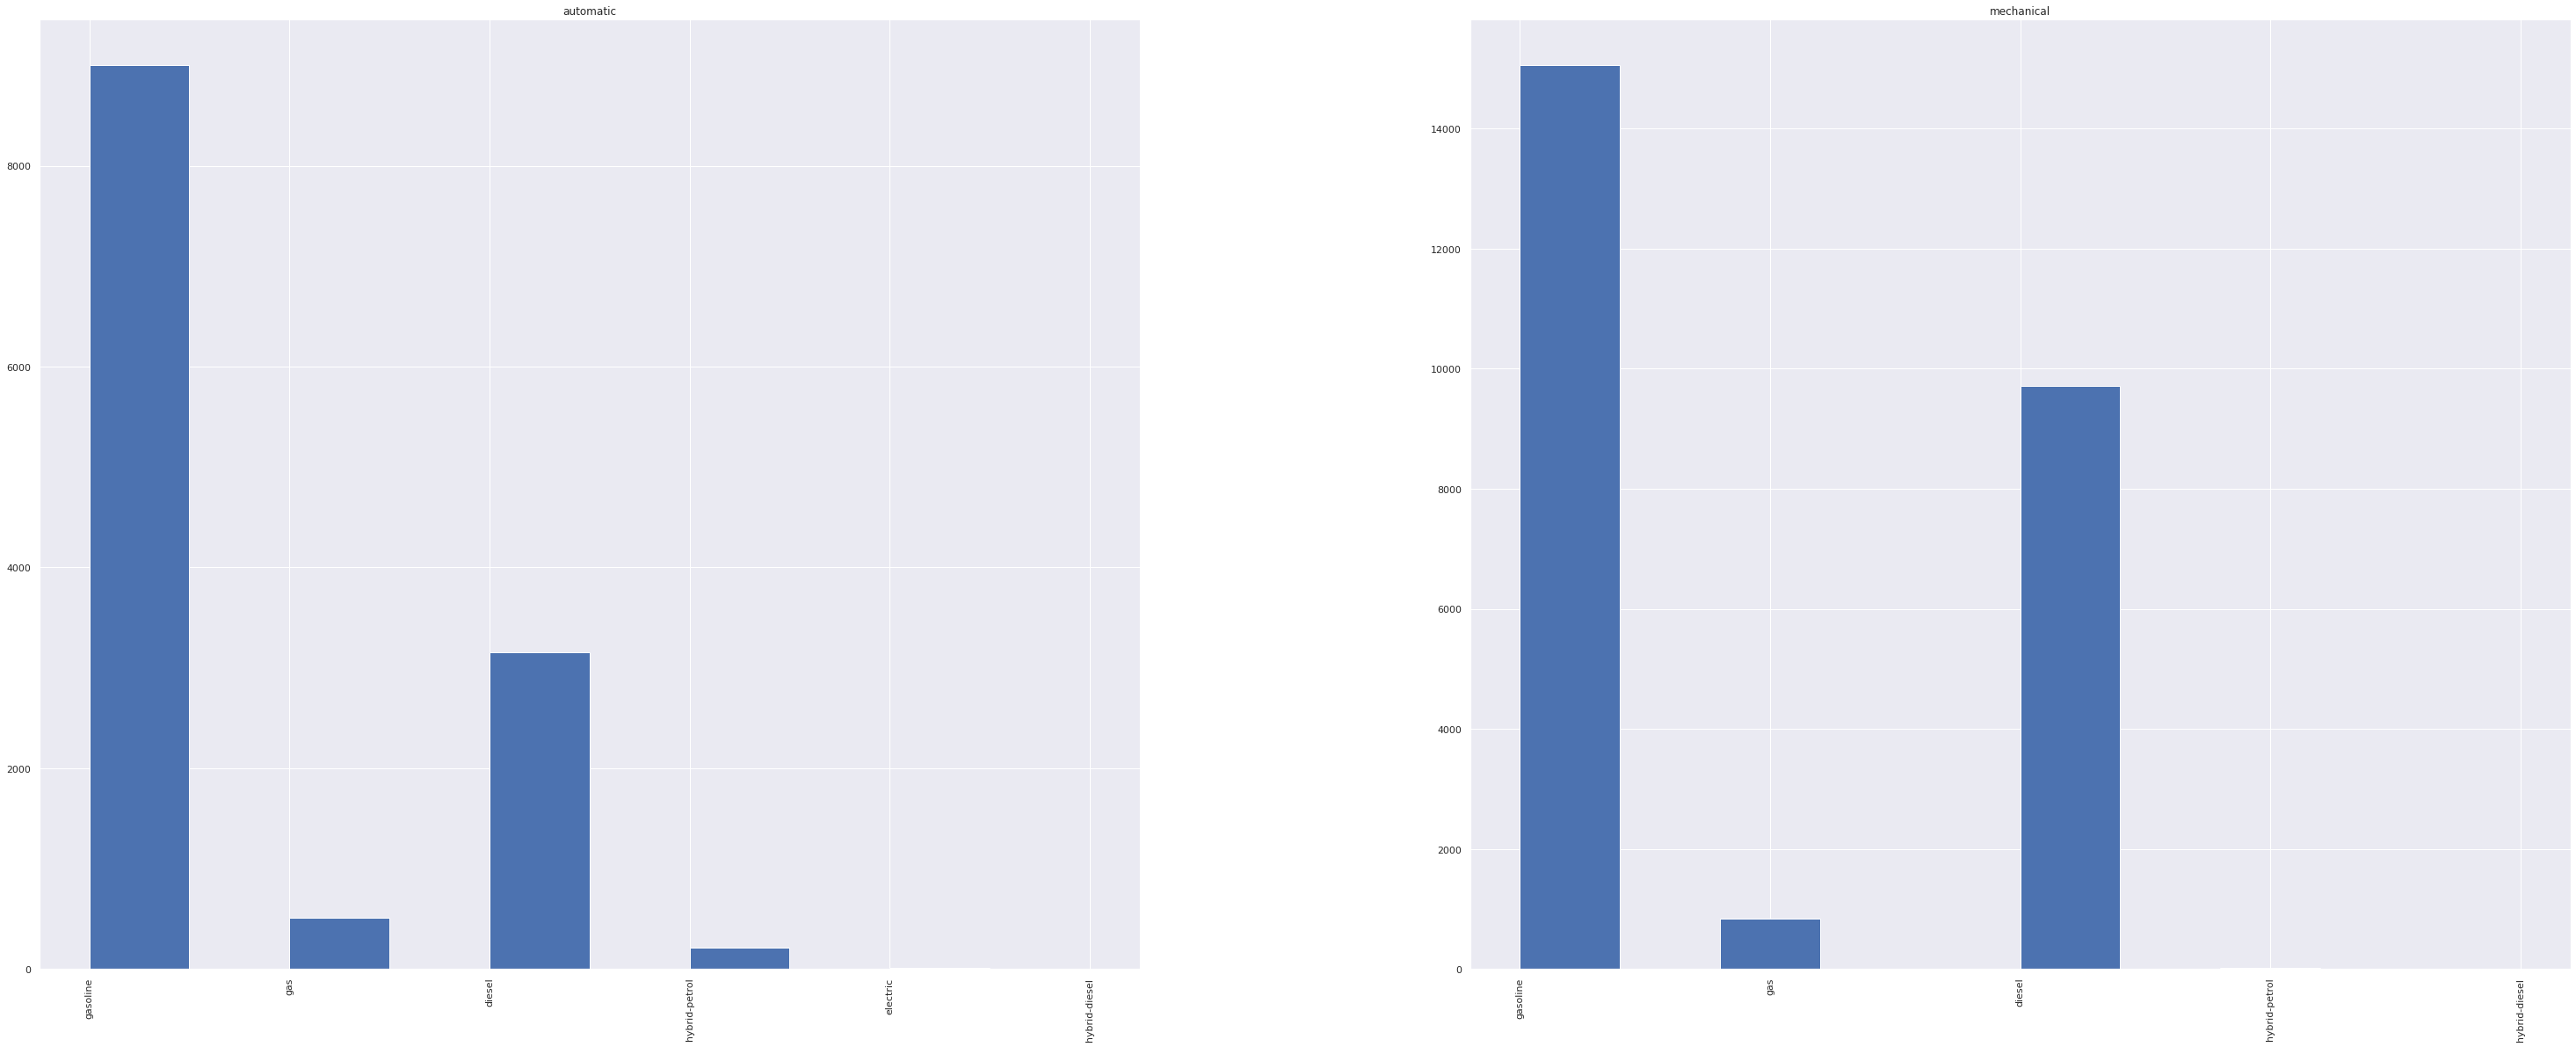

In [ ]:
df.hist(by="transmission",column="engine_fuel")

Most of the cars are gasoline in both type of transmisson

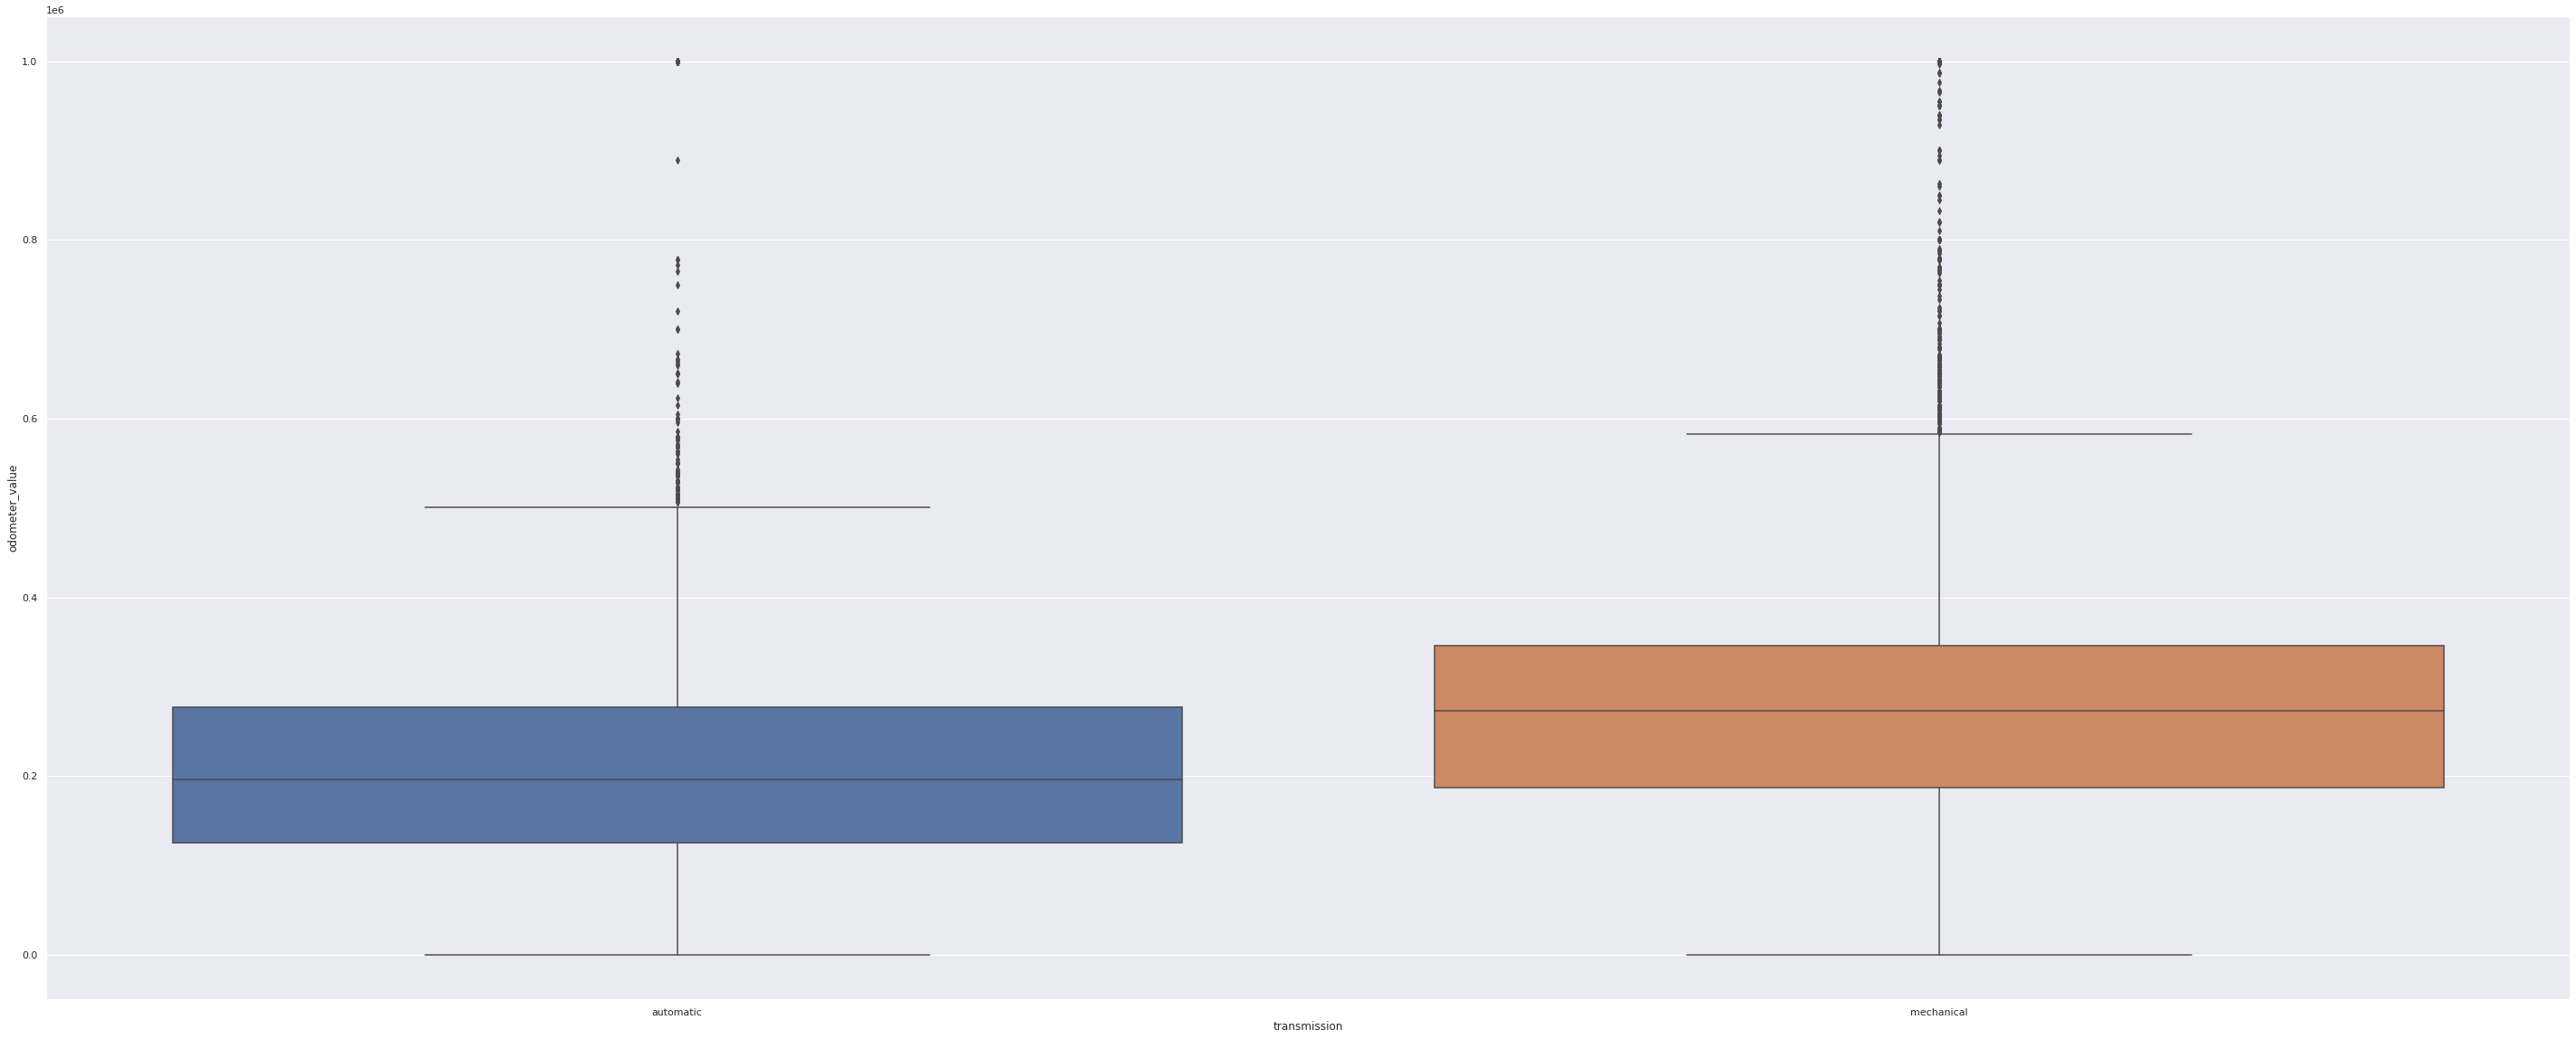

In [ ]:
sns.boxplot(x="transmission" , y="odometer_value", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12249dd410>,
      dtype=object)

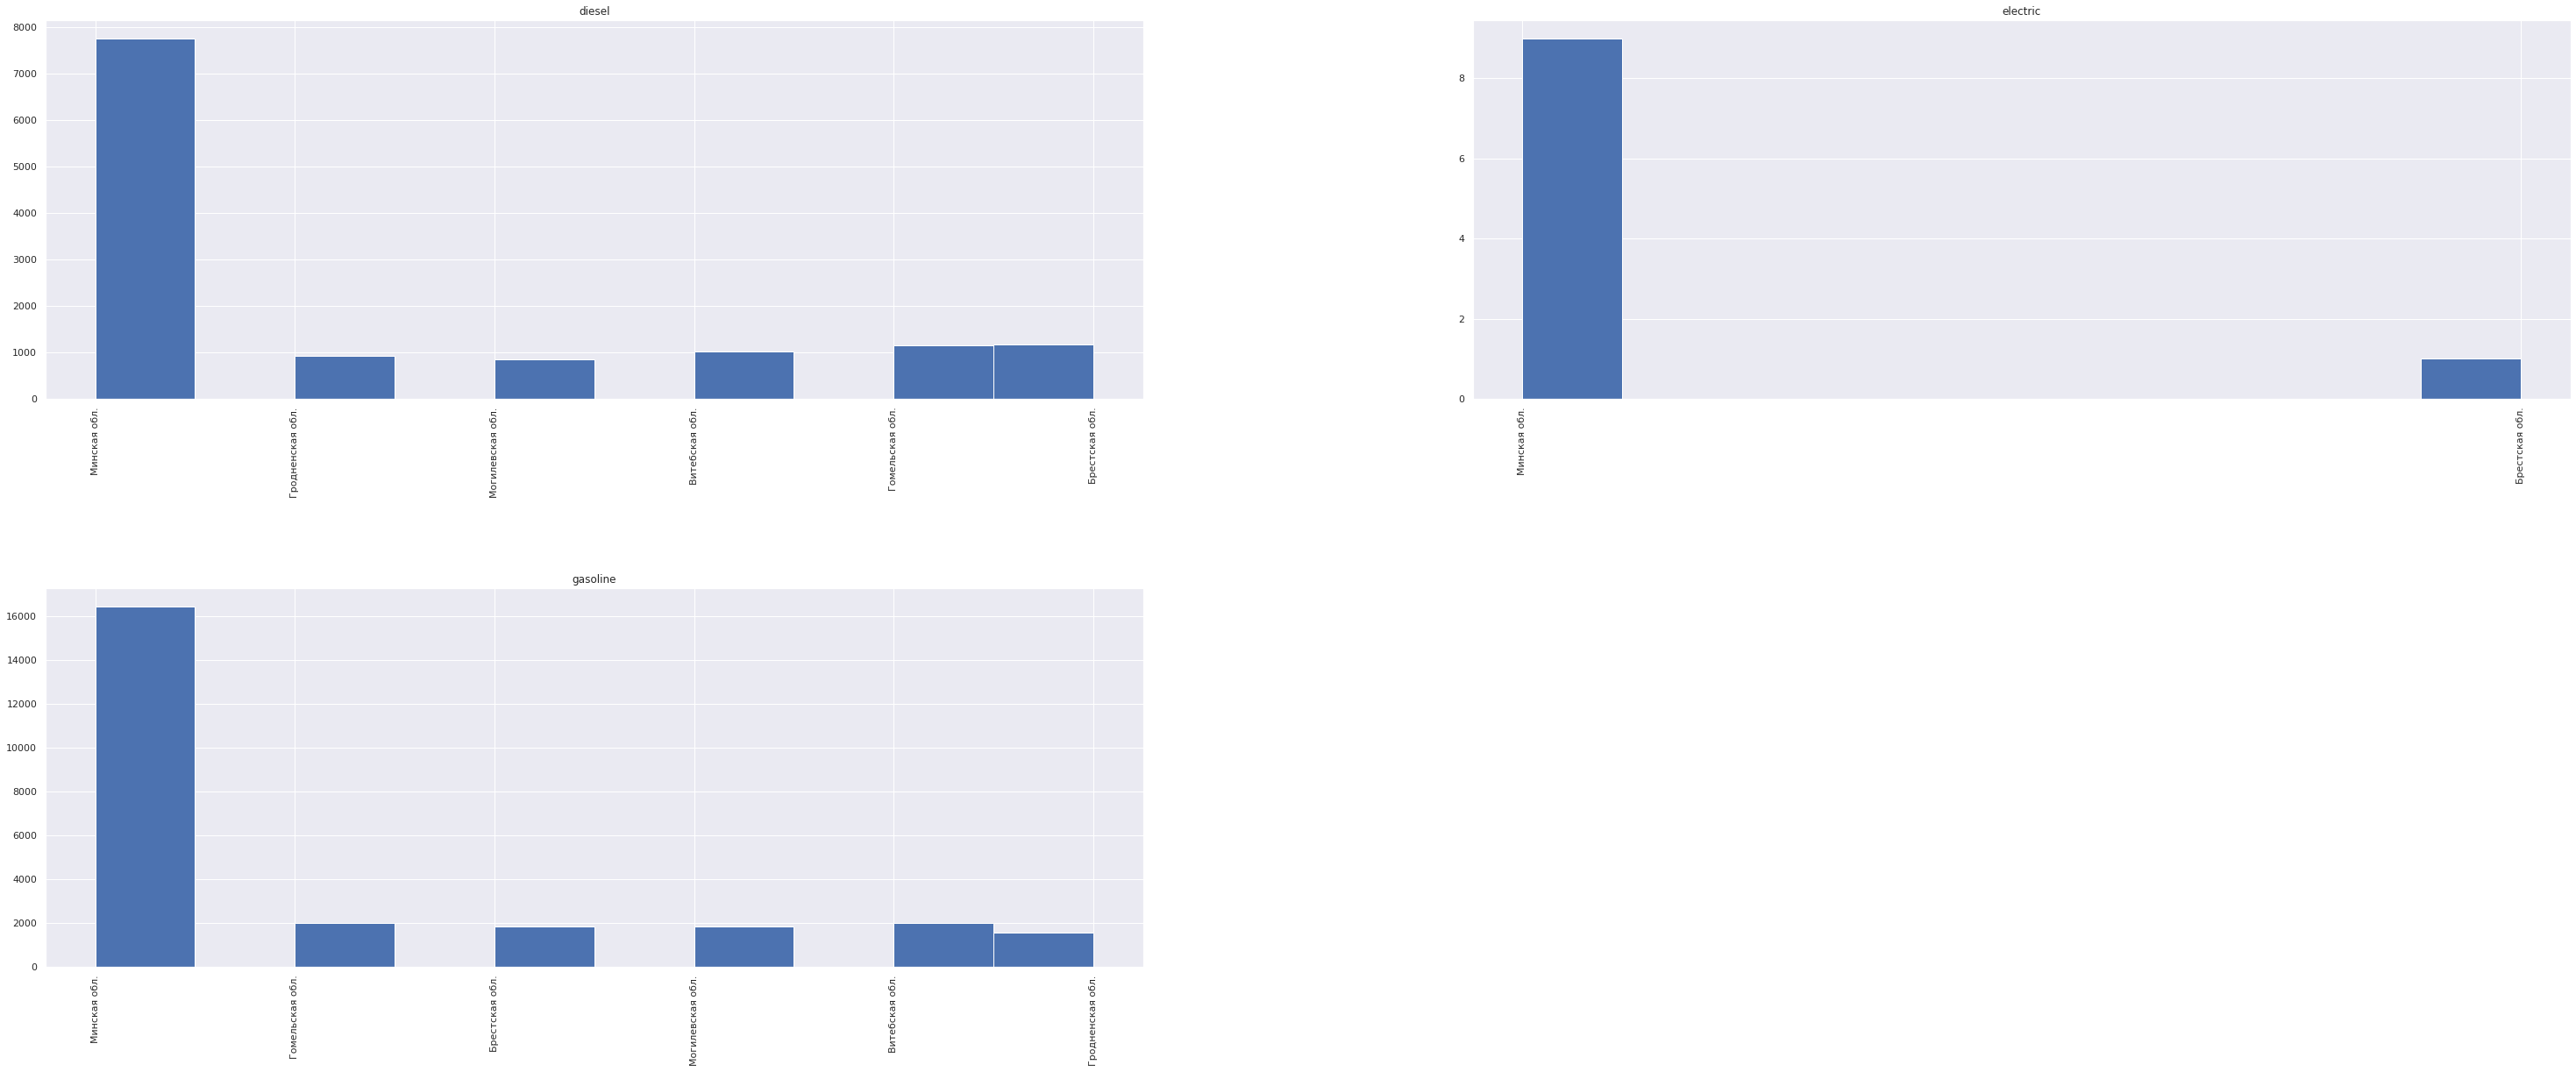

In [ ]:
df.hist(by="engine_type",column="location_region")

Most of the used cars are sold from Минская обл.




